<a href="https://colab.research.google.com/github/goyaljai1/Kaggle-Competitions/blob/main/Spaceship_Titanic_Competition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Spaceship Titanic  🚀🚀🚀
#Predict which passengers are transported to an alternate dimension

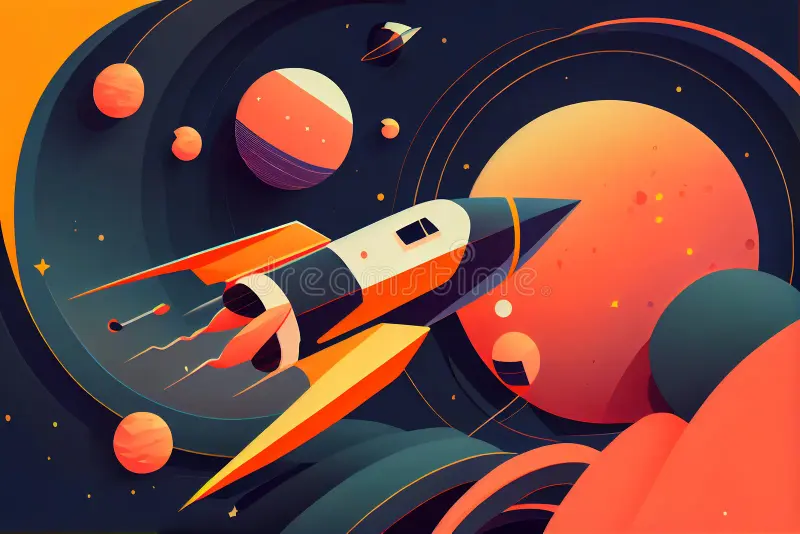

Important points:
1. PassengerId: Unique identifier for each passenger in the format of group number and individual number.
gggg_pp:  gggg indicates group number and pp is their number within the group
3. CryoSleep: Indicator of whether the passenger chose to be in suspended animation during the voyage.
4. Cabin: Cabin number indicating the location of the passenger's accommodation on the ship. Format: deck/num/side

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle competitions download -c spaceship-titanic

  0% 0.00/299k [00:00<?, ?B/s]
100% 299k/299k [00:00<00:00, 87.6MB/s]


In [3]:
!unzip 'spaceship-titanic.zip'

Archive:  spaceship-titanic.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [4]:
#!pip install pandas_profiling

In [5]:
import warnings
warnings.filterwarnings("ignore")

Importing Dependencies

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline,make_pipeline

Creating function for basic info related to dataframe

In [7]:
def basic_info(df):
  #Basic Info
  print("\033[1m" + "Top 5 Rows" + "\033[0m")
  print(tabulate(df.head(), headers='keys', tablefmt='fancy_grid'))
  hr_line()
  print("\033[1m" + "Random 5 Rows" + "\033[0m")
  print(tabulate(df.sample(5), headers='keys', tablefmt='fancy_grid'))
  hr_line()
  print("\033[1m" + "Last 5 Rows" + "\033[0m")
  print(tabulate(df.tail(), headers='keys', tablefmt='fancy_grid'))
  hr_line()
  print("\033[1m" + "Column List" + "\033[0m")
  print(df.columns.to_list())
  hr_line()
  print("\033[1m" + "Shape" + "\033[0m")
  print("Number of Rows: ", df.shape[0])
  print("Number of Columns: ", df.shape[1])
  hr_line()
  print("\033[1m" + "Datatypes of each Column" + "\033[0m")
  print(pd.DataFrame(df.dtypes).to_string(header=False))
  hr_line()
  #Duplicates
  print("\033[1m" + "All Occurances of Duplicated Rows" + "\033[0m")
  repeated_rows = df[df.duplicated(keep=False)]
  occurrences = df.groupby(list(df.columns)).size().reset_index(name='Occurrences')
  repeated_rows_with_occurrences = pd.merge(repeated_rows, occurrences, on=list(df.columns))
  print(tabulate(repeated_rows_with_occurrences, headers='keys', tablefmt='fancy_grid'))
  hr_line()
  print("\033[1m" + "Total Number of Duplicated Rows" + "\033[0m")
  print(df.duplicated().sum())
  hr_line()
  print("\033[1m" + "Shape After Removing Duplicates" + "\033[0m")
  df.drop_duplicates(inplace = True)
  print("Number of Rows: ", df.shape[0])
  print("Number of Columns: ", df.shape[1])
  hr_line()
  #Null Values
  print("\033[1m" + "Null values in each Column" + "\033[0m")
  print(df.isnull().sum().to_string(header=False))
  hr_line()
  print("\033[1m" + "% Null values in each Column" + "\033[0m")
  print((df.isnull().sum()*100/len(df)).to_string(header=False))
  hr_line()
  print("\033[1m" + "Memory Usage of Dataframe" + "\033[0m")
  print(round(df.memory_usage(deep=True).sum()/1000000, 2), "Mb")
  hr_line()
  print("\033[1m" + "Statistical Information" + "\033[0m")
  print(tabulate(df.describe(), headers='keys', tablefmt='fancy_grid'))
  hr_line()
  print("\033[1m" + "# Unique Values" + "\033[0m")
  col = df.columns.to_list()
  for x in col:
    print("Number of unique values in column",x,"=" ,len(df[x].unique()))

In [8]:
#printing functions
def hr_line():
  print('-'*125)

In [9]:
#unique categorical values
def unique_cat_values(cols, df):
  for col in cols:
    print(df[col].value_counts())

In [72]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
df_train = train_data.copy()
df_test = test_data.copy()

In [73]:
#basic info about training data
basic_info(df_train)

Top 5 Rows
╒════╤═══════════════╤══════════════╤═════════════╤═════════╤═══════════════╤═══════╤═══════╤═══════════════╤═════════════╤════════════════╤═══════╤══════════╤═══════════════════╤═══════════════╕
│    │   PassengerId │ HomePlanet   │ CryoSleep   │ Cabin   │ Destination   │   Age │ VIP   │   RoomService │   FoodCourt │   ShoppingMall │   Spa │   VRDeck │ Name              │ Transported   │
╞════╪═══════════════╪══════════════╪═════════════╪═════════╪═══════════════╪═══════╪═══════╪═══════════════╪═════════════╪════════════════╪═══════╪══════════╪═══════════════════╪═══════════════╡
│  0 │       0001_01 │ Europa       │ False       │ B/0/P   │ TRAPPIST-1e   │    39 │ False │             0 │           0 │              0 │     0 │        0 │ Maham Ofracculy   │ False         │
├────┼───────────────┼──────────────┼─────────────┼─────────┼───────────────┼───────┼───────┼───────────────┼─────────────┼────────────────┼───────┼──────────┼───────────────────┼───────────────┤
│  1 │   

In [74]:
#basic info about training data
basic_info(df_test)

Top 5 Rows
╒════╤═══════════════╤══════════════╤═════════════╤═════════╤═══════════════╤═══════╤═══════╤═══════════════╤═════════════╤════════════════╤═══════╤══════════╤══════════════════╕
│    │   PassengerId │ HomePlanet   │ CryoSleep   │ Cabin   │ Destination   │   Age │ VIP   │   RoomService │   FoodCourt │   ShoppingMall │   Spa │   VRDeck │ Name             │
╞════╪═══════════════╪══════════════╪═════════════╪═════════╪═══════════════╪═══════╪═══════╪═══════════════╪═════════════╪════════════════╪═══════╪══════════╪══════════════════╡
│  0 │       0013_01 │ Earth        │ True        │ G/3/S   │ TRAPPIST-1e   │    27 │ False │             0 │           0 │              0 │     0 │        0 │ Nelly Carsoning  │
├────┼───────────────┼──────────────┼─────────────┼─────────┼───────────────┼───────┼───────┼───────────────┼─────────────┼────────────────┼───────┼──────────┼──────────────────┤
│  1 │       0018_01 │ Earth        │ False       │ F/4/S   │ TRAPPIST-1e   │    19 │ False │ 

In [75]:
dataset = [df_train, df_test]

In [76]:
df_train.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

Cleaning Cabin column to extract Deck and Side info

In [78]:
def split_cabin(x):
  if len(str(x).split('/')) < 3:
    return [np.nan, np.nan, np.nan]
  else:
    return str(x).split('/')

Using Group Number to check whether passanger is alone or not

In [79]:
def split_PassengerId(x):
    return str(x).split('_')

In [80]:
for data in dataset:
  data.drop(columns = ['Name'], inplace = True)
  data['TempCabin'] = data['Cabin'].apply(lambda x: split_cabin(x))
  data['Deck'] = data['TempCabin'].apply(lambda x: x[0])
  data['Side'] = data['TempCabin'].apply(lambda x: x[2])
  data.drop(columns = ['TempCabin', 'Cabin'], inplace = True)


In [81]:
#Whether passenger Is Alone or not?
for data in dataset:
  data['TempId'] = data['PassengerId'].apply(lambda x: split_PassengerId(x))
  data['GroupNumber'] = data['TempId'].apply(lambda x: x[0])
  data.drop(columns = ['TempId'], inplace = True)
  data['GroupNumber'] = data['GroupNumber'].astype(int)
  data['IsAlone'] = data.groupby('GroupNumber')['GroupNumber'].transform(lambda x: 1 if len(x) == 1 else 0)
  data.drop(columns = ['GroupNumber','PassengerId'], inplace =True)

In [82]:
for data in dataset:
  data['Destination'].replace({'TRAPPIST-1e':'T', 'PSO J318.5-22':'P','55 Cancri e' : 'C' }, inplace = True)

In [83]:
categorical_col = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Deck', 'Side', 'IsAlone']
numerical_col = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
target_col = ['Transported']

In [84]:
df_train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Side,IsAlone
0,Europa,False,T,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,P,1
1,Earth,False,T,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,S,1
2,Europa,False,T,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,S,0
3,Europa,False,T,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,S,0
4,Earth,False,T,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,S,1


#EXPLORATORY DATA ANALYSIS

HomePlanet Column

In [85]:
#null values
null_values = df_train['HomePlanet'].isnull().sum()
print("Missing Values: ", null_values, "\n % missing values: ",100*null_values/len(df_train))

Missing Values:  201 
 % missing values:  2.312205222592891


<Axes: xlabel='HomePlanet', ylabel='count'>

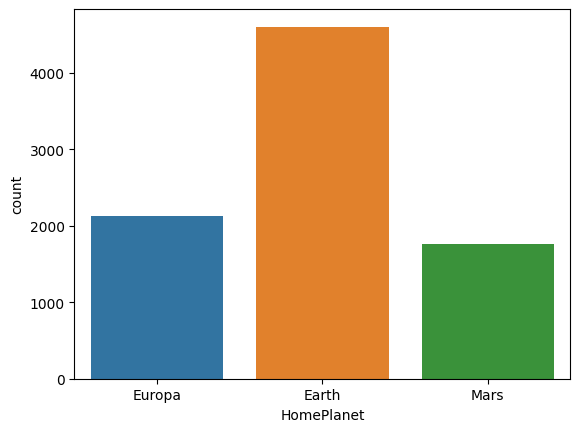

In [86]:
#Count Plot
sns.countplot(data = df_train, x = 'HomePlanet')

In [87]:
import pandas as pd
from scipy.stats import chi2_contingency
import numpy as np

# Calculate the Cramér's V coefficient between 'HomePlanet' and other columns
correlation_results = []
for column in df_train.columns:
    contingency_table = pd.crosstab(df_train['HomePlanet'], df_train[column])
    chi2, _, _, _ = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))
    correlation_results.append((column, cramers_v))

# Create a DataFrame with the correlation results
correlation_df = pd.DataFrame(correlation_results, columns=['Column', 'Cramér\'s V'])


In [88]:
correlation_df

,Column,Cramér's V
0,HomePlanet,1.000000
1,CryoSleep,0.118587
2,Destination,0.262318
3,Age,0.241087
4,VIP,0.177795
5,RoomService,0.460394
6,FoodCourt,0.469044
7,ShoppingMall,0.407521
8,Spa,0.423082
9,VRDeck,0.420554


<Axes: xlabel='HomePlanet', ylabel='count'>

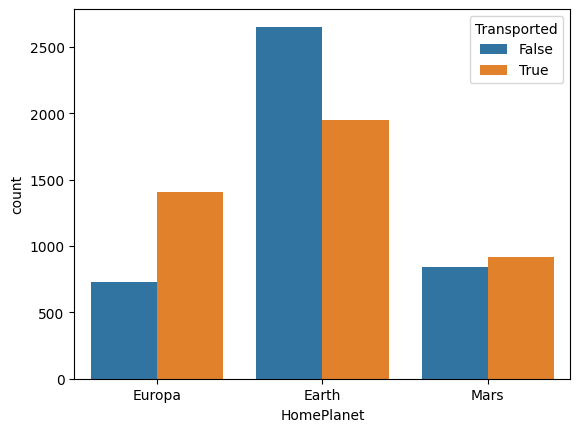

In [89]:
sns.countplot(data = df_train, x = 'HomePlanet', hue = 'Transported')

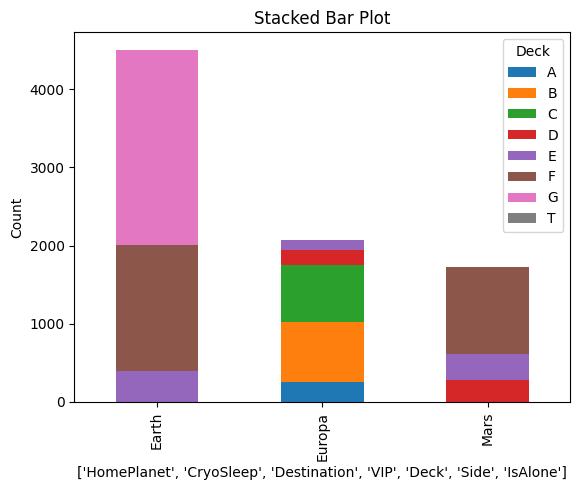

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
# Create a cross-tabulation or contingency table
cross_tab = pd.crosstab(df_train['HomePlanet'], df_train['Deck'])

# Plot the stacked bar plot
cross_tab.plot(kind='bar', stacked=True)

# Add labels and title
plt.xlabel(categorical_col)
plt.ylabel('Count')
plt.title('Stacked Bar Plot')

# Display the plot
plt.show()


'AGE' COLUMN

In [91]:
df_train['Age'].describe()

count    8514.000000
mean       28.827930
std        14.489021
min         0.000000
25%        19.000000
50%        27.000000
75%        38.000000
max        79.000000
Name: Age, dtype: float64

<Axes: xlabel='Age', ylabel='Count'>

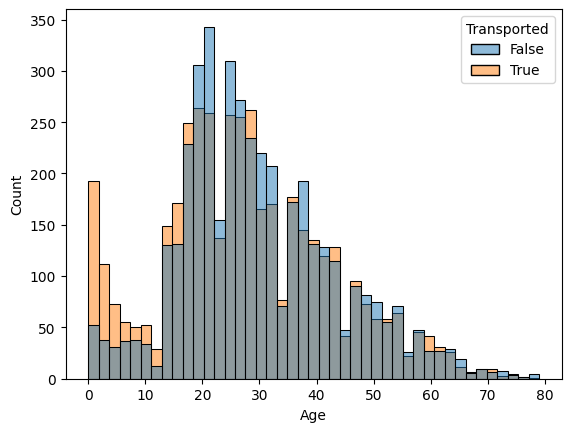

In [92]:
sns.histplot(data = df_train, x = 'Age', hue = 'Transported')

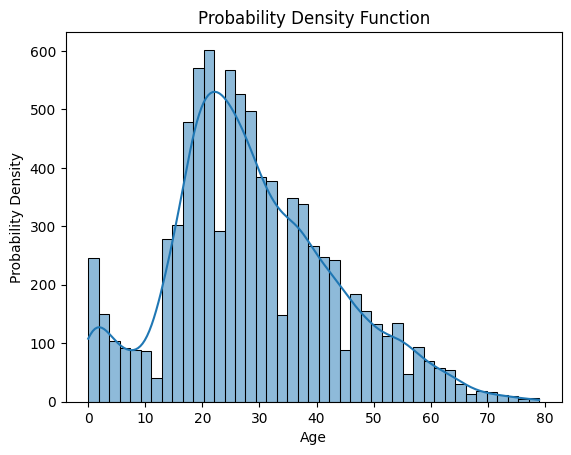

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the PDF using seaborn
sns.histplot(data = df_train, x='Age', kde=True)

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Probability Density')
plt.title('Probability Density Function')

# Display the plot
plt.show()


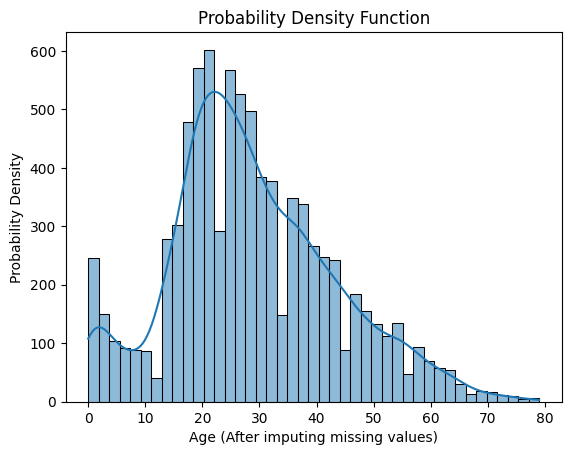

In [94]:
sns.histplot(data = df_train, x='Age', kde=True)

# Add labels and title
plt.xlabel('Age (After imputing missing values)')
plt.ylabel('Probability Density')
plt.title('Probability Density Function')

# Display the plot
plt.show()


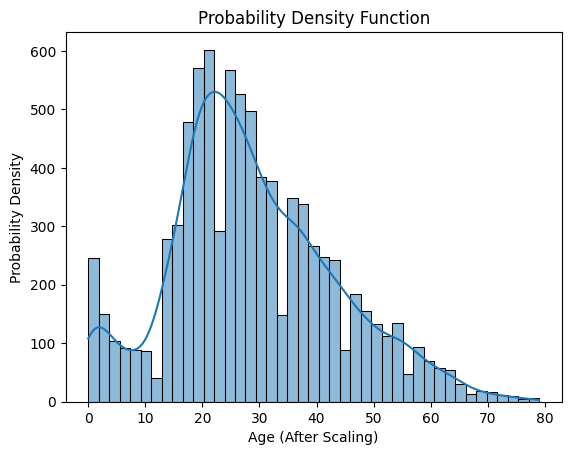

In [95]:
sns.histplot(data = df_train, x='Age', kde=True)

# Add labels and title
plt.xlabel('Age (After Scaling)')
plt.ylabel('Probability Density')
plt.title('Probability Density Function')

# Display the plot
plt.show()


#HANDLING MISSING VALUES:


*   Iterative Imputer for Numerical Columns
*   KNNImputer for Categorical Columns (Reference: [link](https://www.kaggle.com/discussions/questions-and-answers/153147))



In [96]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [97]:
imputer = IterativeImputer(initial_strategy = 'mean', max_iter = 50, n_nearest_features = 5)
imputer.fit_transform(df_train[numerical_col])
df_train[numerical_col] = imputer.transform(df_train[numerical_col])
df_test[numerical_col] = imputer.transform(df_test[numerical_col])

In [98]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()

def find_category_mappings(df, variable):
    return {k: i for i, k in enumerate(df[variable].dropna().unique(), 0)}

def integer_encode(df, variable, ordinal_mapping):
    df[variable] = df[variable].map(ordinal_mapping)

mappin = dict()
def imputation(df1 , cols):
    df = df1.copy()
    #Encoding dict &amp; Removing nan
    #mappin = dict()
    for variable in cols:
        mappings = find_category_mappings(df, variable)
        mappin[variable] = mappings

    #Apply mapping
    for variable in cols:
        integer_encode(df, variable, mappin[variable])

    #Minmaxscaler and KNN imputation
    sca = mm.fit_transform(df)
    knn_imputer = KNNImputer()
    knn = knn_imputer.fit_transform(sca)
    df.iloc[:,:] = mm.inverse_transform(knn)
    for i in df.columns :
        df[i] = round(df[i]).astype('int')

    #Inverse transform
    for i in cols:
        inv_map = {v: k for k, v in mappin[i].items()}
        df[i] = df[i].map(inv_map)
    return df


#Imputation
df_train = imputation(df_train,categorical_col)

In [99]:
df_test = imputation(df_train, categorical_col)

#Data Scaling

In [100]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(df_train[numerical_col])

df_train[numerical_col] = scaler.transform(df_train[numerical_col])
df_test[numerical_col] = scaler.transform(df_test[numerical_col])

In [101]:
df_train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Side,IsAlone
0,Europa,False,T,0.709559,False,-0.340421,-0.286919,-0.290836,-0.276255,-0.268140,0,B,P,1
1,Earth,False,T,-0.336158,False,-0.175210,-0.281278,-0.248988,0.211621,-0.229323,1,F,S,1
2,Europa,False,T,2.034132,True,-0.275246,1.954387,-0.290836,5.691115,-0.224911,0,A,S,0
3,Europa,False,T,0.291272,False,-0.340421,0.517218,0.330181,2.682103,-0.097871,0,A,S,0
4,Earth,False,T,-0.893873,False,0.118834,-0.243046,-0.038077,0.225839,-0.266376,1,F,S,1


#Power Transformer
Yeo-Johnson Transformer

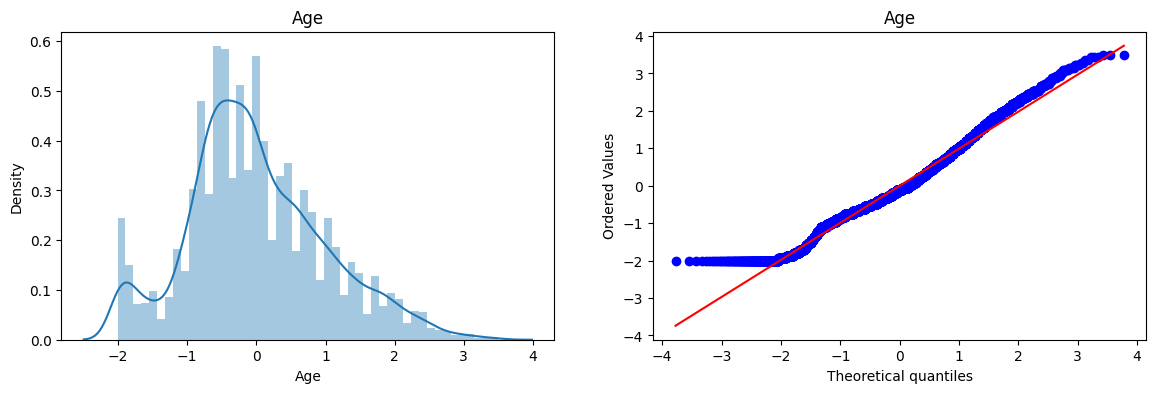

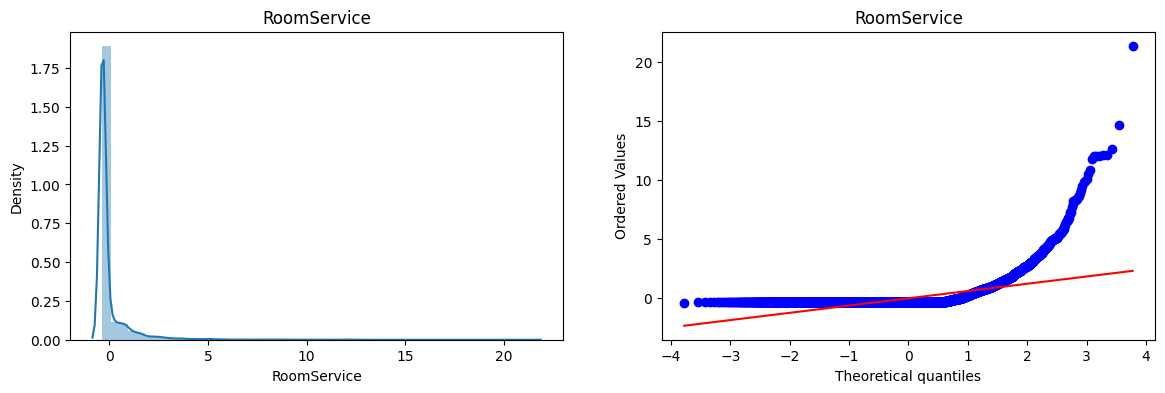

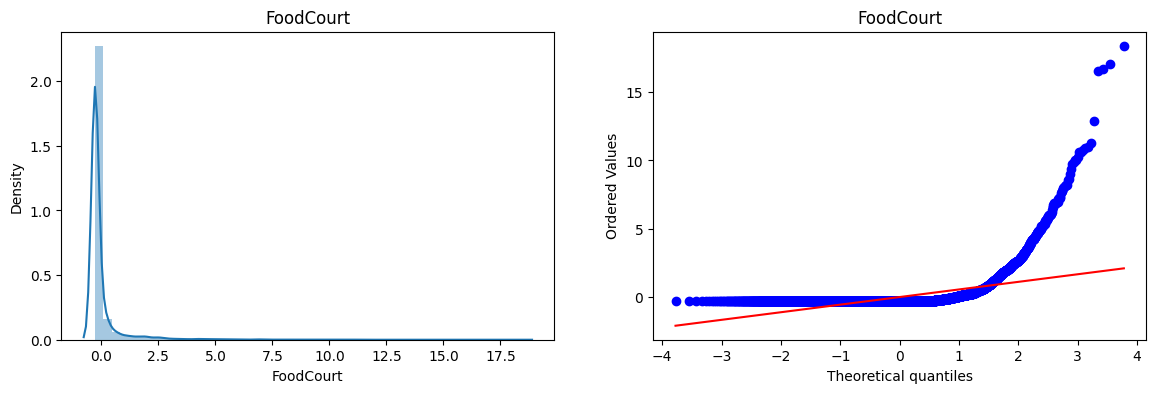

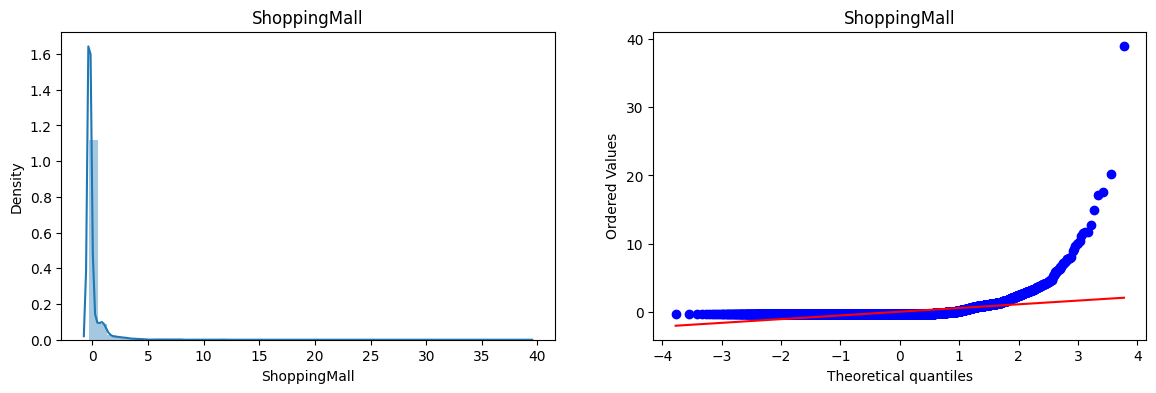

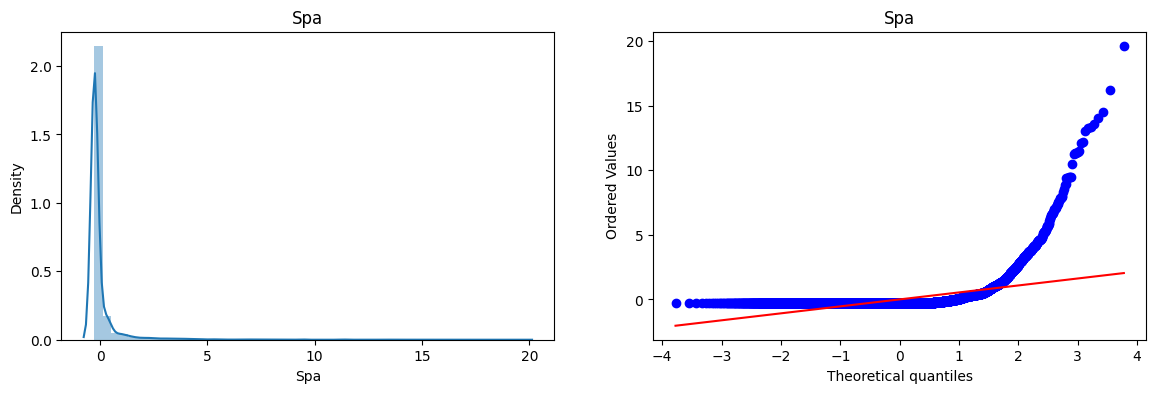

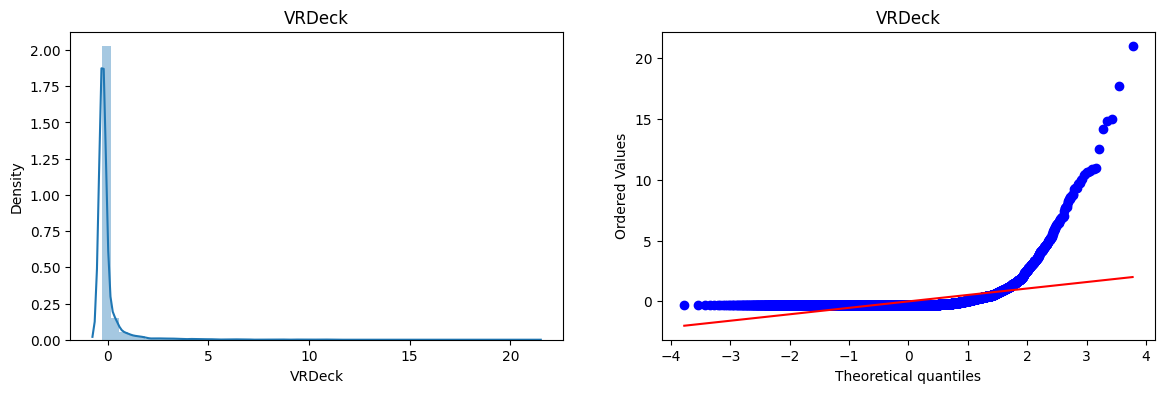

In [102]:
# Plotting the distplots without any transformation
import scipy.stats as stats

for col in numerical_col:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(df_train[col])
    plt.title(col)

    plt.subplot(122)
    stats.probplot(df_train[col], dist="norm", plot=plt)
    plt.title(col)

    plt.show()

In [103]:
from sklearn.preprocessing import PowerTransformer

transformer = PowerTransformer()

df_train[numerical_col] = transformer.fit_transform(df_train[numerical_col])
df_test[numerical_col] = transformer.transform(df_test[numerical_col])

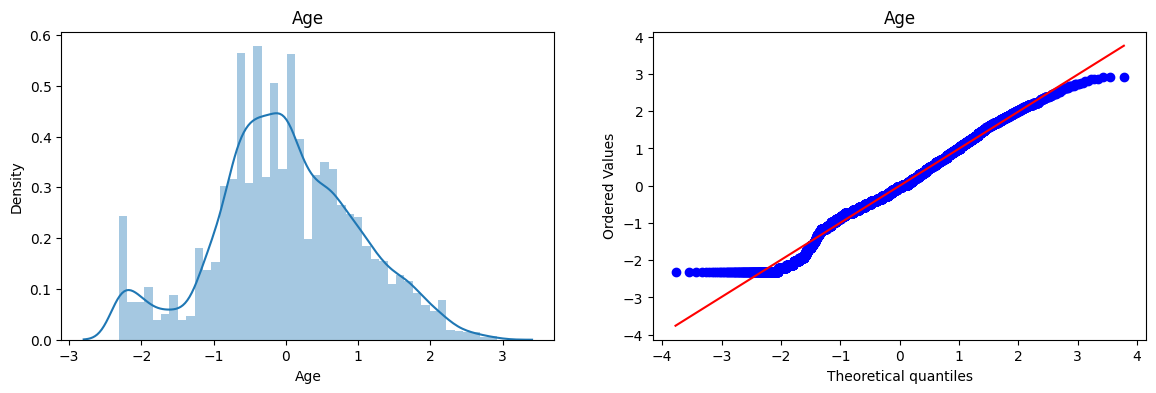

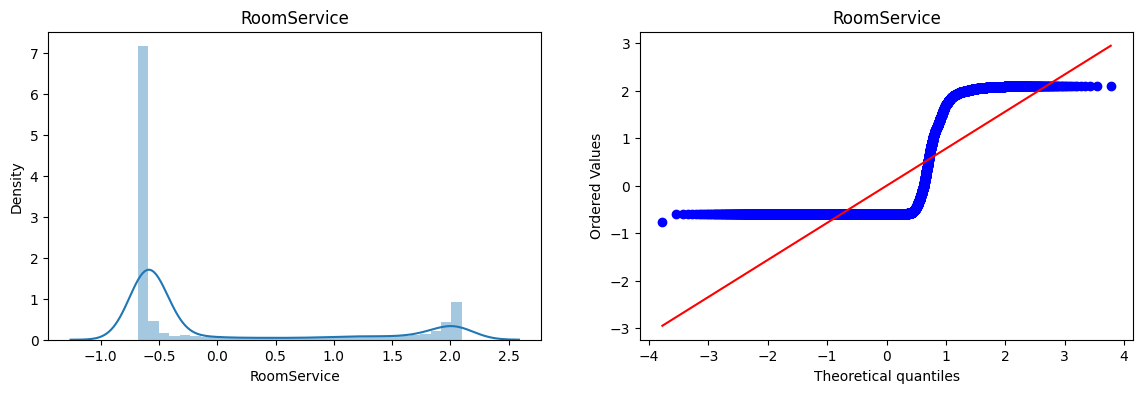

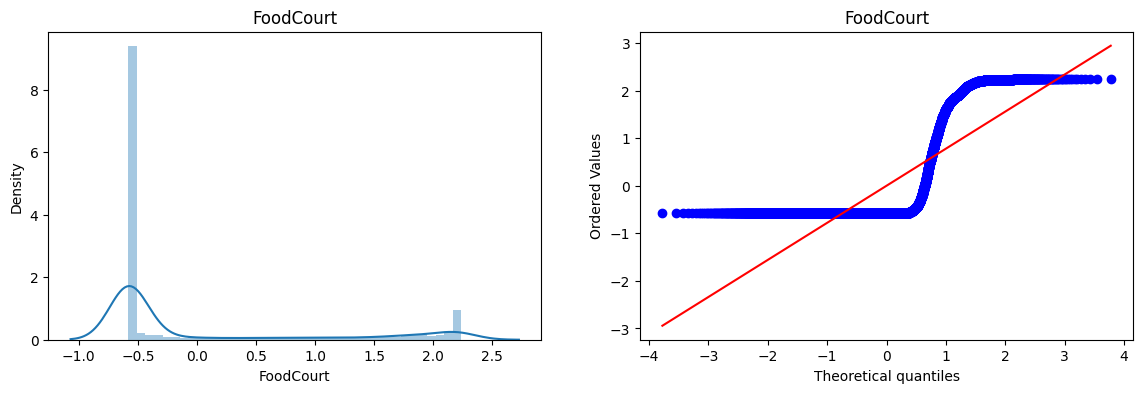

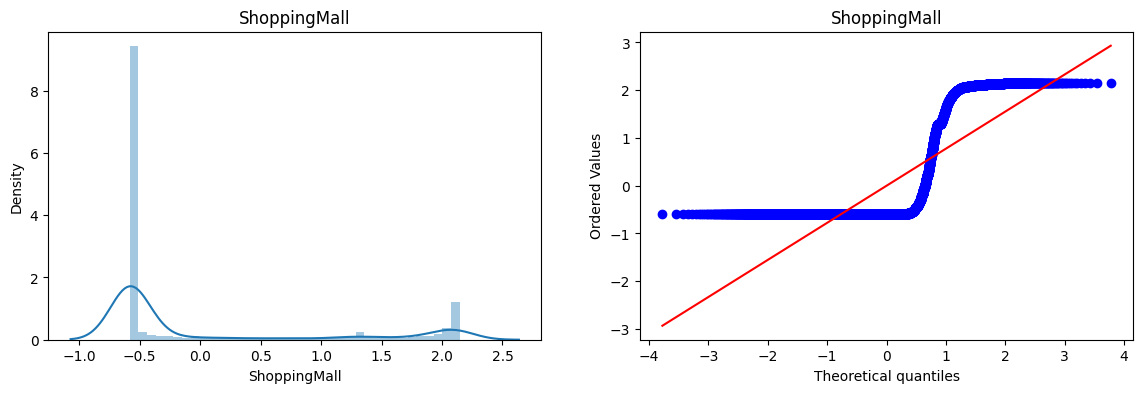

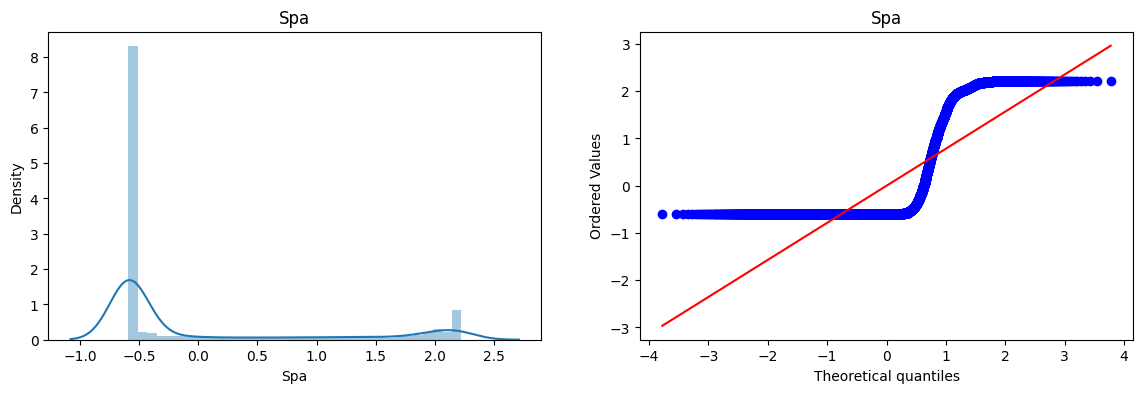

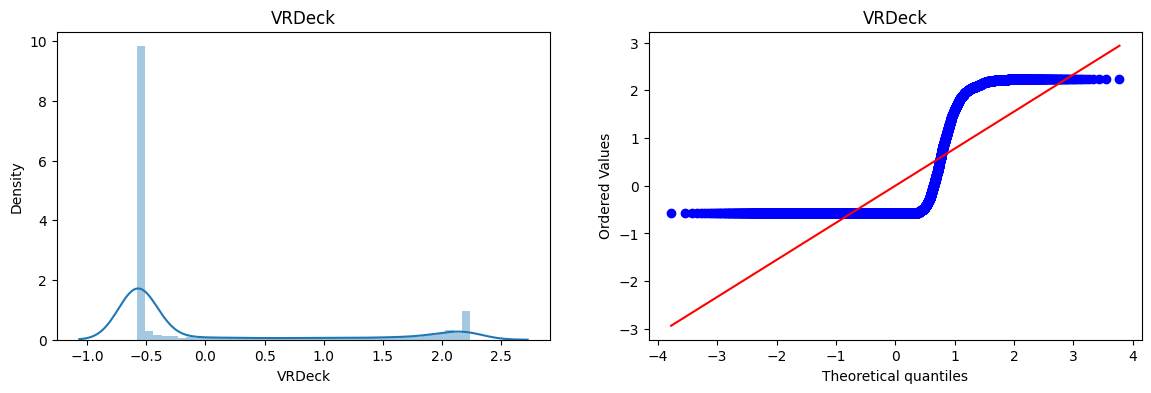

In [104]:
for col in numerical_col:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(df_train[col])
    plt.title(col)

    plt.subplot(122)
    stats.probplot(df_train[col], dist="norm", plot=plt)
    plt.title(col)

    plt.show()

#Encoding Categorical Values

In [105]:
df_train = pd.get_dummies(df_train, columns = categorical_col)
df_test = pd.get_dummies(df_test, columns = categorical_col)

In [106]:
df_train.columns

Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Transported', 'HomePlanet_Earth', 'HomePlanet_Europa',
       'HomePlanet_Mars', 'CryoSleep_False', 'CryoSleep_True', 'Destination_C',
       'Destination_P', 'Destination_T', 'VIP_False', 'VIP_True', 'Deck_A',
       'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_T',
       'Side_P', 'Side_S', 'IsAlone_0', 'IsAlone_1'],
      dtype='object')

In [107]:
df_test.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,...,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_P,Side_S,IsAlone_0,IsAlone_1
0,0.755147,-0.594068,-0.579768,-0.582009,-0.589442,-0.576852,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
1,-0.267562,0.602986,-0.512134,-0.142361,1.864537,-0.107746,1,1,0,0,...,0,0,0,1,0,0,0,1,0,1
2,1.844723,-0.040580,2.225859,-0.582009,2.219772,-0.059360,0,0,1,0,...,0,0,0,0,0,0,0,1,1,0
3,0.371339,-0.594068,2.089791,1.888320,2.216962,0.983306,0,0,1,0,...,0,0,0,0,0,0,0,1,1,0
4,-0.902209,1.537924,-0.092096,1.208802,1.881860,-0.553756,1,1,0,0,...,0,0,0,1,0,0,0,1,0,1


#Binning of Numerical Features

In [108]:
from sklearn.preprocessing import KBinsDiscretizer

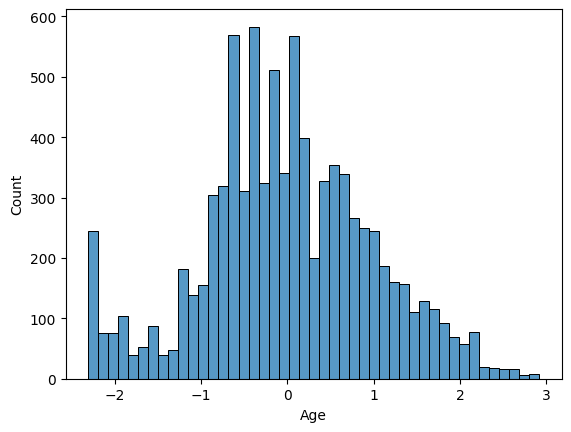

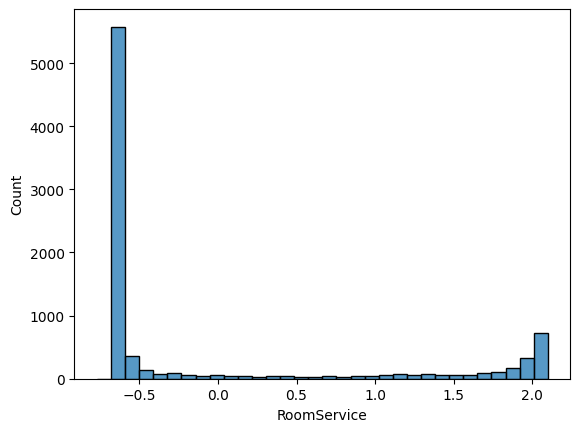

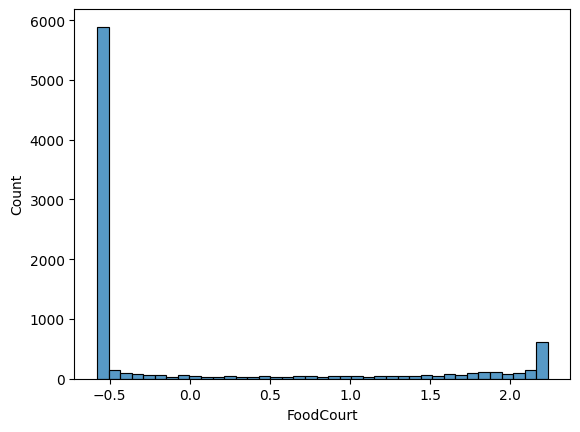

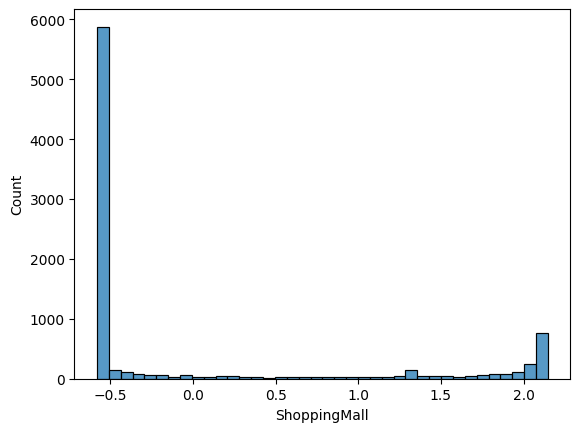

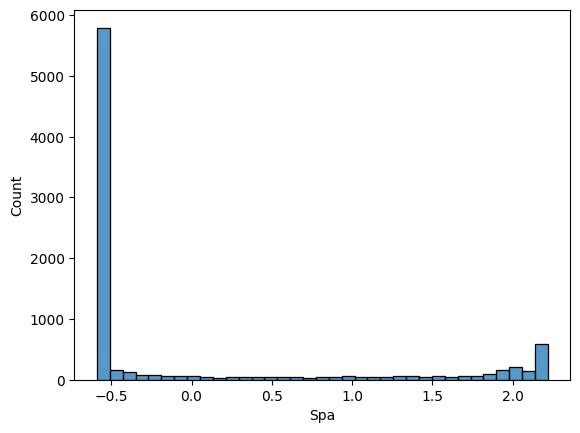

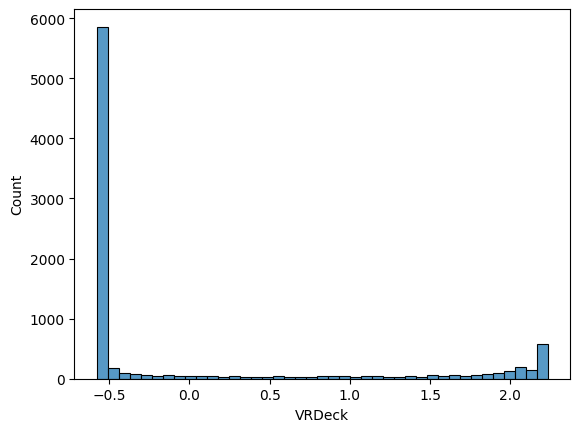

In [109]:
for col in numerical_col:
  sns.histplot(data = df_test, x = col)
  plt.show()

In [110]:
numerical_col

['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

In [111]:
discretizer = KBinsDiscretizer(n_bins = [16, 7, 7, 7, 7, 7], strategy = 'quantile', encode = 'ordinal')

In [112]:
discretizer.fit(df_train[numerical_col])

KBinsDiscretizer(encode='ordinal', n_bins=[16, 7, 7, 7, 7, 7])

In [113]:
df_train[numerical_col] = discretizer.transform(df_train[numerical_col])
df_test[numerical_col] = discretizer.transform(df_test[numerical_col])

In [114]:
df_train.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,...,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_P,Side_S,IsAlone_0,IsAlone_1
0,12.0,1.0,0.0,0.0,0.0,0.0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
1,6.0,2.0,0.0,1.0,2.0,1.0,1,1,0,0,...,0,0,0,1,0,0,0,1,0,1
2,15.0,2.0,2.0,0.0,2.0,1.0,0,0,1,0,...,0,0,0,0,0,0,0,1,1,0
3,10.0,1.0,2.0,2.0,2.0,1.0,0,0,1,0,...,0,0,0,0,0,0,0,1,1,0
4,2.0,2.0,1.0,1.0,2.0,0.0,1,1,0,0,...,0,0,0,1,0,0,0,1,0,1


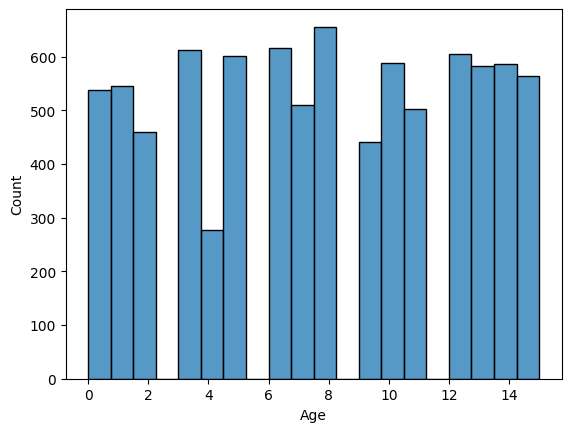

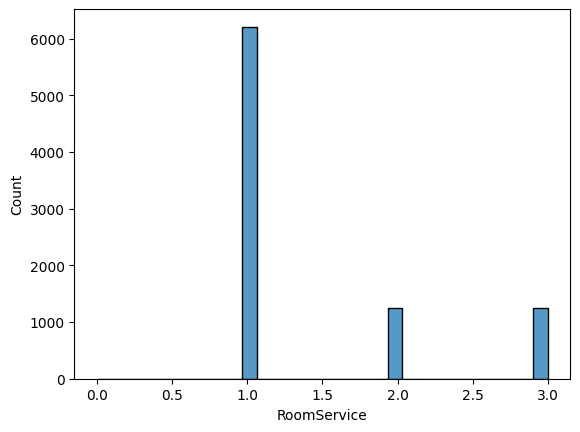

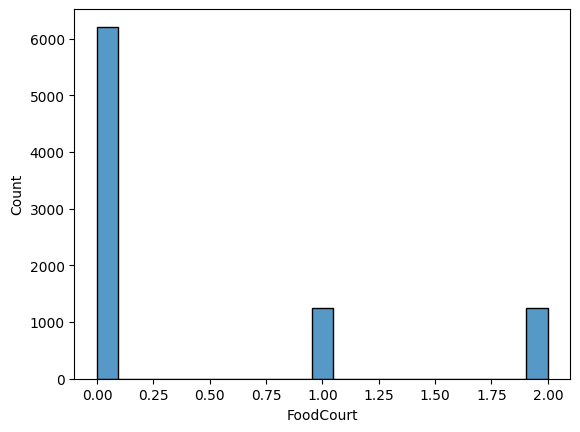

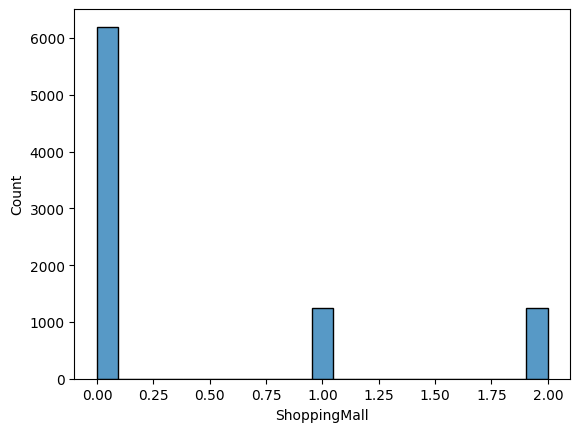

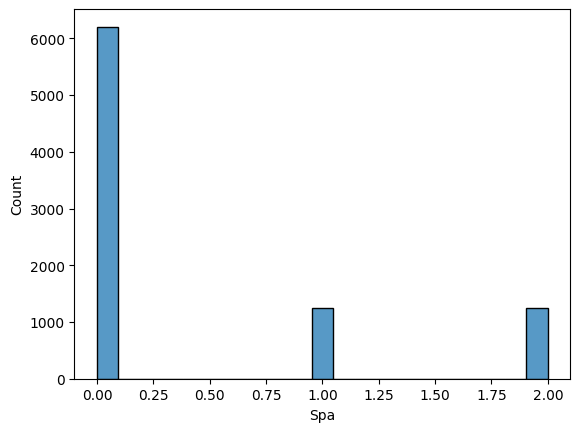

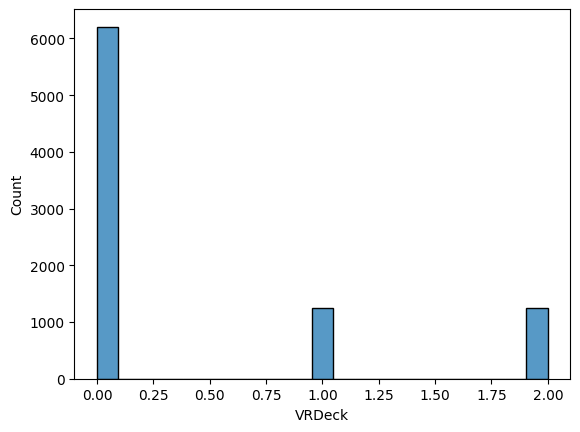

In [115]:
#Distribution after binarization

for col in numerical_col:
  sns.histplot(data = df_train, x = col)
  plt.show()

#Best Feature Selection

In [116]:
correlation_matrix = df_train.corr()
target_correlation = correlation_matrix['Transported']
print(target_correlation.sort_values())

CryoSleep_False     -0.470791
Spa                 -0.335086
RoomService         -0.334885
VRDeck              -0.307147
HomePlanet_Earth    -0.174027
ShoppingMall        -0.140477
IsAlone_1           -0.113792
Side_P              -0.108641
Deck_E              -0.099075
Destination_T       -0.095898
Deck_F              -0.086125
FoodCourt           -0.081469
Age                 -0.073402
VIP_True            -0.037261
Deck_D              -0.032922
Deck_T              -0.014568
Deck_A              -0.005076
Destination_P       -0.000865
Deck_G               0.015960
HomePlanet_Mars      0.021319
VIP_False            0.037261
Deck_C               0.108535
Side_S               0.108641
Destination_C        0.109613
IsAlone_0            0.113792
Deck_B               0.145049
HomePlanet_Europa    0.180524
CryoSleep_True       0.470791
Transported          1.000000
Name: Transported, dtype: float64


In [117]:
#drop unnecessary features
dataset = [df_train, df_test]

for data in dataset:
  data.drop(columns = ['CryoSleep_True', 'IsAlone_1', 'VIP_False'], inplace = True)

In [118]:
df_train.columns

Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Transported', 'HomePlanet_Earth', 'HomePlanet_Europa',
       'HomePlanet_Mars', 'CryoSleep_False', 'Destination_C', 'Destination_P',
       'Destination_T', 'VIP_True', 'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D',
       'Deck_E', 'Deck_F', 'Deck_G', 'Deck_T', 'Side_P', 'Side_S',
       'IsAlone_0'],
      dtype='object')

In [119]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn import model_selection

In [120]:
df_train_X = df_train.drop(columns = 'Transported')
df_train_y = df_train['Transported']
X_train, X_test, y_train, y_test = model_selection.train_test_split(df_train_X, df_train_y, random_state = 0)

In [121]:
feature_selector = SelectKBest(score_func = chi2, k = 19)

In [122]:
selected_features = feature_selector.fit_transform(X_train, y_train)

In [123]:
selected_features_dataframe = pd.DataFrame({'Feature' : list(X_train.columns), 'Score': feature_selector.scores_})
selected_features_dataframe.sort_values(by = 'Score', ascending = False)

,Feature,Score
4,Spa,889.918331
5,VRDeck,796.524221
9,CryoSleep_False,522.323723
1,RoomService,281.983182
3,ShoppingMall,150.216672
7,HomePlanet_Europa,150.103036
15,Deck_B,129.153886
0,Age,102.128360
6,HomePlanet_Earth,79.002914
2,FoodCourt,67.416282


In [125]:
feature_indices = feature_selector.get_support(indices=True)

# Create a new dataframe with the selected features
selected_features = X_train.columns[feature_indices]
X_train_new = X_train[selected_features]
X_test_new = X_test[selected_features]

In [128]:
X_train_new.shape

(6519, 19)

In [129]:
X_test_new.shape

(2174, 19)

#TRAINING MODEL

In [133]:
import pandas as pd
from sklearn import ensemble, gaussian_process, linear_model, naive_bayes, neighbors, svm, tree, discriminant_analysis
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score


def model_testing(X_train, X_test, y_train, y_test):
  # Define the list of different machine learning algorithms
  MLA = [
      # Ensemble Methods
      ensemble.AdaBoostClassifier(),
      ensemble.BaggingClassifier(),
      ensemble.ExtraTreesClassifier(),
      ensemble.GradientBoostingClassifier(),
      ensemble.RandomForestClassifier(),

      # Gaussian Processes
      gaussian_process.GaussianProcessClassifier(),

      # GLM
      linear_model.LogisticRegressionCV(),
      linear_model.PassiveAggressiveClassifier(),
      linear_model.RidgeClassifierCV(),
      linear_model.SGDClassifier(),
      linear_model.Perceptron(),

      # Navies Bayes
      naive_bayes.BernoulliNB(),
      naive_bayes.GaussianNB(),

      # Nearest Neighbor
      neighbors.KNeighborsClassifier(),

      # SVM
      svm.SVC(probability=True),
      svm.NuSVC(probability=True),
      svm.LinearSVC(),

      # Trees
      tree.DecisionTreeClassifier(),
      tree.ExtraTreeClassifier(),

      # Discriminant Analysis
      discriminant_analysis.LinearDiscriminantAnalysis(),
      discriminant_analysis.QuadraticDiscriminantAnalysis(),

      #XGBClassifier
      XGBClassifier()
  ]

  # Create empty lists to store the results
  algo_names = []
  train_accuracy_scores = []
  test_accuracy_scores = []

  # Iterate over each algorithm in MLA
  for model in MLA:
      # Fit the model on the training data
      model.fit(X_train, y_train)

      # Make predictions on the training data
      train_y_pred = model.predict(X_train)


      # Calculate the accuracy for the training data
      train_accuracy = accuracy_score(y_train, train_y_pred)

      # Make predictions on the testing data
      test_y_pred = model.predict(X_test)

      # Calculate the accuracy for the testing data
      test_accuracy = accuracy_score(y_test, test_y_pred)

      # Store the results in the lists
      algo_names.append(type(model).__name__)
      train_accuracy_scores.append(train_accuracy)
      test_accuracy_scores.append(test_accuracy)

  # Create a dataframe from the results
  results_df = pd.DataFrame({
      'Algorithm': algo_names,
      'Training Accuracy': train_accuracy_scores,
      'Testing Accuracy': test_accuracy_scores
  })

  print(tabulate(results_df, headers='keys', tablefmt='fancy_grid'))


In [134]:
model_testing(X_train_new, X_test_new, y_train, y_test)

╒════╤═══════════════════════════════╤═════════════════════╤════════════════════╕
│    │ Algorithm                     │   Training Accuracy │   Testing Accuracy │
╞════╪═══════════════════════════════╪═════════════════════╪════════════════════╡
│  0 │ AdaBoostClassifier            │            0.776039 │           0.783809 │
├────┼───────────────────────────────┼─────────────────────┼────────────────────┤
│  1 │ BaggingClassifier             │            0.917932 │           0.770929 │
├────┼───────────────────────────────┼─────────────────────┼────────────────────┤
│  2 │ ExtraTreesClassifier          │            0.929744 │           0.75621  │
├────┼───────────────────────────────┼─────────────────────┼────────────────────┤
│  3 │ GradientBoostingClassifier    │            0.799356 │           0.791628 │
├────┼───────────────────────────────┼─────────────────────┼────────────────────┤
│  4 │ RandomForestClassifier        │            0.929744 │           0.772309 │
├────┼──────────

#HYPERPARAMETER TUNING

In [138]:
from sklearn.model_selection import RandomizedSearchCV

In [157]:
from sklearn import (ensemble, gaussian_process, linear_model, naive_bayes,
                     neighbors, svm, tree, discriminant_analysis)
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
import pandas as pd

# Define the list of algorithms
MLA = [
    # Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    # Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),

    # GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),

    # Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),

    # Nearest Neighbor
    neighbors.KNeighborsClassifier(),

    # SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),

    # Trees
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),

    # Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),

    # XGBClassifier
    XGBClassifier()
]

# Define the hyperparameter grid for each algorithm
param_grid = [
    {'n_estimators': [50, 100, 200]},
    {'n_estimators': [10, 50, 100]},
    {'n_estimators': [50, 100, 200], 'max_depth': [None, 5, 10]},
    {'n_estimators': [50, 100, 200], 'learning_rate': [0.1, 0.05, 0.01]},
    {'n_estimators': [50, 100, 200], 'max_depth': [None, 5, 10]},
    {'max_iter_predict': [50, 100, 200]},
    {'solver': ['lbfgs', 'liblinear'], 'penalty': ['l2']},
    {'C': [0.1, 1, 10]},
    {'alphas': [[0.1, 1, 10]]},
    {'alpha': [0.0001, 0.001, 0.01]},
    {'alpha': [0.0001, 0.001, 0.01]},
    {'alpha': [0.1, 1, 10], 'binarize': [0.0, 0.5, 1.0]},
    {},
    {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']},
    {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    {'nu': [0.1, 0.5, 0.9], 'kernel': ['linear', 'rbf']},
    {'C': [0.1, 1, 10]},
    {'max_depth': [None, 5, 10]},
    {'max_depth': [None, 5, 10]},
    {},
    {},
    {'learning_rate': [0.1, 0.05, 0.01], 'max_depth': [3, 5, 10]}
]

results_df = pd.DataFrame(columns=['Algorithm', 'Best_Params', 'Accuracy'])

for algorithm, param in zip(MLA, param_grid):
    clf = RandomizedSearchCV(algorithm, param_distributions=param, n_iter=10, scoring='accuracy', cv=5)
    clf.fit(X_train_new, y_train)

    results_df = results_df.append({
        'Algorithm': clf.estimator.__class__.__name__,
        'Best_Params': clf.best_params_,
        'Accuracy': clf.best_score_
    }, ignore_index=True)

In [158]:
results_df

,Algorithm,Best_Params,Accuracy
0,AdaBoostClassifier,{'n_estimators': 100},0.774659
1,BaggingClassifier,{'n_estimators': 100},0.757787
2,ExtraTreesClassifier,"{'n_estimators': 200, 'max_depth': 10}",0.783863
3,GradientBoostingClassifier,"{'n_estimators': 100, 'learning_rate': 0.1}",0.788312
4,RandomForestClassifier,"{'n_estimators': 200, 'max_depth': 10}",0.785244
5,GaussianProcessClassifier,{'max_iter_predict': 50},0.771437
6,LogisticRegressionCV,"{'solver': 'liblinear', 'penalty': 'l2'}",0.776193
7,PassiveAggressiveClassifier,{'C': 0.1},0.689655
8,RidgeClassifierCV,"{'alphas': [0.1, 1, 10]}",0.778034
9,SGDClassifier,{'alpha': 0.01},0.775273


We can also use other robust algorithms such as stacking, voting classification, ANN, RNN for better classification.

#Hope you enjoyed and find it insightful..👋🏼👋🏼